# Chimeras

While working on my research I took a detour and found some chimeras.

In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
import networkx as nx


### Functions

In [2]:
def F(x):
    #Internal dynamics of each node
    return x**2 - x

In [3]:
def G(x):
    #External dynamics of each node
    #(Nothing)
    return x

In [4]:
def iterate(x0,f,n):
    #Returns n length orbit of x0 under f
    
    orbit = [x0]
    x = x0
    for i in range(n):
        x = f(x)
        orbit.append(x)
    return orbit

In [5]:
def synchronize(x,F,G,A,d=.2,iters=50):
    """
    Computes the orbit of x under the following equation:
    x_i[k+1] = F(x_i[k])+d*SUM_j{ A_ij*[G(x_i[k])-G(x_j[k])] }
         for j = 1,2, ... n
     Parameters
     ----------
     x (nx1 ndarray): initial value
     F (function): Internal dynamics of nodes
     G (function): How nodes affect eachother
     A (nxn ndarray): Adjacency Matrix
     d (float): dampening parameter
     iters (int): orbit length
     
     Returns
     -------
     orb (iters x n ndarray) : orbit of x under the above equation
    """
    deg = A.sum(axis=0)
    L = np.diag(deg) - A
    def GraphDynam(x):
        return F(x) + d*np.dot(L,G(x))
    orb = iterate(x,GraphDynam,iters)
    return np.array(orb)
    

### Plotting Functions

In [15]:
def plotRandomOrbits(orb,k=0):
    #Plots five random orbits
    m,nNodes = orb.shape
    r0,r1,r2,r3,r4 = np.random.choice(range(nNodes),size=5,replace=False)
    plt.rcParams['figure.figsize'] = (10,5)
    plt.plot(orb[k:,r0])
    plt.plot(orb[k:,r1])
    plt.plot(orb[k:,r2])
    plt.plot(orb[k:,r3])
    plt.plot(orb[k:,r4])
    #plt.savefig('orbit_d.4n10p.1.png',dpi=150)
    plt.show()
    print("Variance in last orbit: {}".format(np.var(orb[-1])))
    
def plotAllOrb(orb,k=0):
    #Plots every orbit
    m,n = orb.shape   
    plt.rcParams['figure.figsize'] = (10,5)
    for i in range(n):
        plt.plot(orb[k:,i],label="Node "+str(i+1))
    plt.xlabel("Iteration")
    plt.ylabel("Node Values")
    plt.legend()
    plt.show()
    print("Node variance in last iteration: {}".format(np.var(orb[-1])))

### Star Graph 1

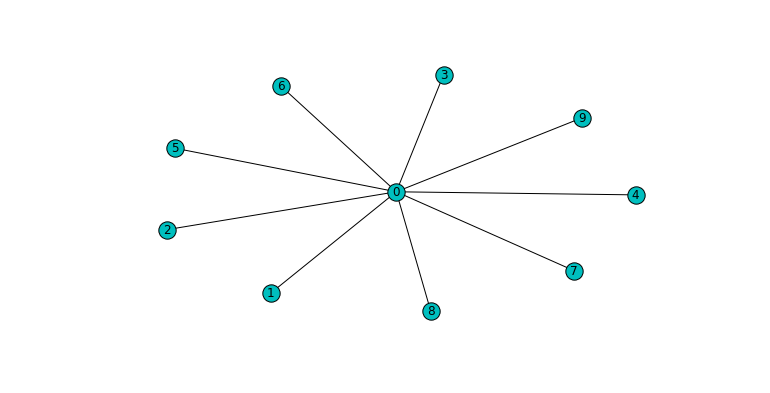

In [17]:
nNodes=10

A = np.zeros((nNodes,nNodes))
A[0,:] = np.ones(nNodes)
A[:,0] = np.ones(nNodes)

graph = nx.from_numpy_matrix(A)
labels = {0:'0',1:'1',2:'2',3:'3',
          4:'4',5:'5',6:'6',7:'7',
          8:'8',9:'9'
         }
nx.draw(graph,with_labels=True,node_color='c')
plt.show()

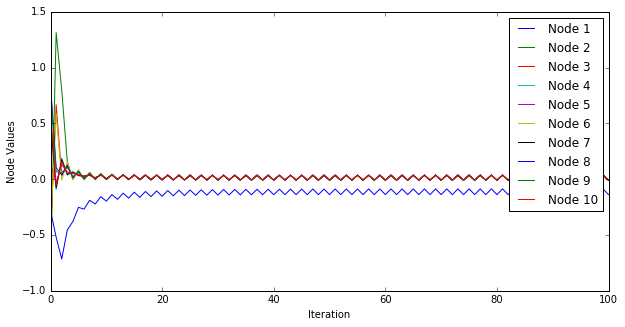

Node variance in last iteration: 0.00149960849007


In [18]:
nNodes = A.shape[0]
#x =np.random.rand(nNodes)
chimera = np.array([ -0.28329926, -0.79257329, -0.47900975,  0.4605653 ,  0.12948887,
       -0.43348878,  0.5343736 ,  0.84077595,  0.79935279,  0.59625345])

orb = synchronize(chimera,F,G,A,d=0.21,iters=100)
plotAllOrb(orb,k=0)


We have a chimera! The orbit of node 0 is in blue and all other nodes are in red. It's stability is highly dependent on the d value.

### Caterpillar graph

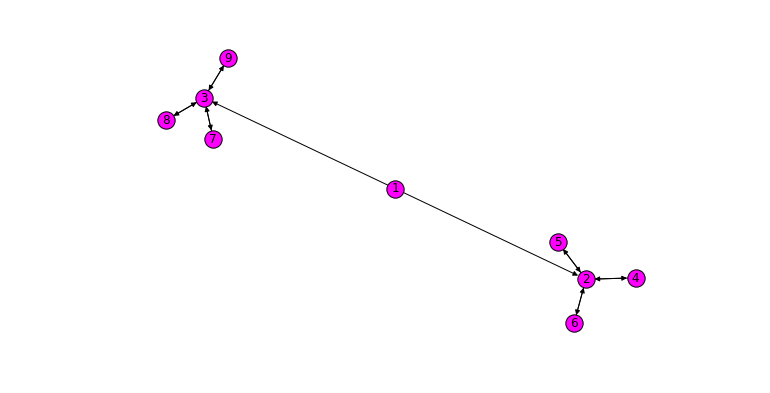

In [40]:
A = np.array([
        [0,0,0,0,0,0,0,0,0],
        [1,0,0,1,1,1,0,0,0],
        [1,0,0,0,0,0,1,1,1],
        [0,1,0,0,0,0,0,0,0],
        [0,1,0,0,0,0,0,0,0],
        [0,1,0,0,0,0,0,0,0],
        [0,0,1,0,0,0,0,0,0],
        [0,0,1,0,0,0,0,0,0],
        [0,0,1,0,0,0,0,0,0],
])


graph = nx.from_numpy_matrix(A.T,create_using=nx.DiGraph())
labels = {0:'1',1:'2',2:'3',3:'4',
          4:'5',5:'6',6:'7',7:'8',
          8:'9'
         }
nx.draw(graph,labels=labels,arrows=True,node_color='magenta')
plt.show()

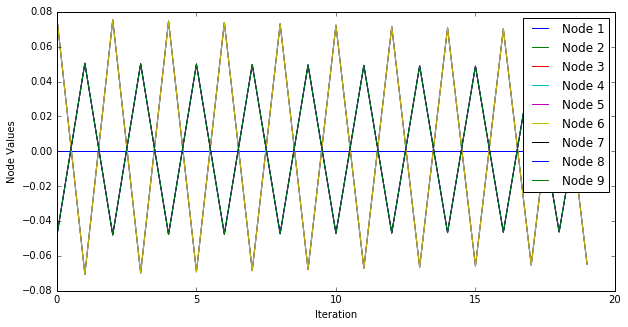

Node variance in last iteration: 0.00284832821504

Last four iterations:
[[ 2.73126500e-38  7.02200791e-02 -4.64362521e-02  7.02200791e-02
   7.02200791e-02  7.02200791e-02 -4.64362521e-02 -4.64362521e-02
  -4.64362521e-02]
 [-1.14713130e-38 -6.52892196e-02  4.85925776e-02 -6.52892196e-02
  -6.52892196e-02 -6.52892196e-02  4.85925776e-02  4.85925776e-02
   4.85925776e-02]
 [ 4.81795146e-39  6.95519018e-02 -4.62313390e-02  6.95519018e-02
   6.95519018e-02  6.95519018e-02 -4.62313390e-02 -4.62313390e-02
  -4.62313390e-02]
 [-2.02353961e-39 -6.47144347e-02  4.83686757e-02 -6.47144347e-02
  -6.47144347e-02 -6.47144347e-02  4.83686757e-02  4.83686757e-02
   4.83686757e-02]]


In [41]:
nNodes = A.shape[0]
x =np.random.rand(nNodes)*2 -1

#Initialize the nodes to create symmetry
chimera = np.array([0.35517314, 
                    0.96144917, 0.96144917, 
                    0.58088468, 0.25307204, 0.82456638,
                    0.58088468, 0.25307204,0.82456638])

orb = synchronize(x,F,G,A,d=.29,iters=100)
#Randomly choose orbits
plotAllOrb(orb,k=-20)
print("\nLast four iterations:")
print(orb[-4:,:])

Three different groups. Node 1 remains close to zero. Nodes 2,4,5,6 form one group and Nodes 3,7,8,9 form another.

### Star Graph 2

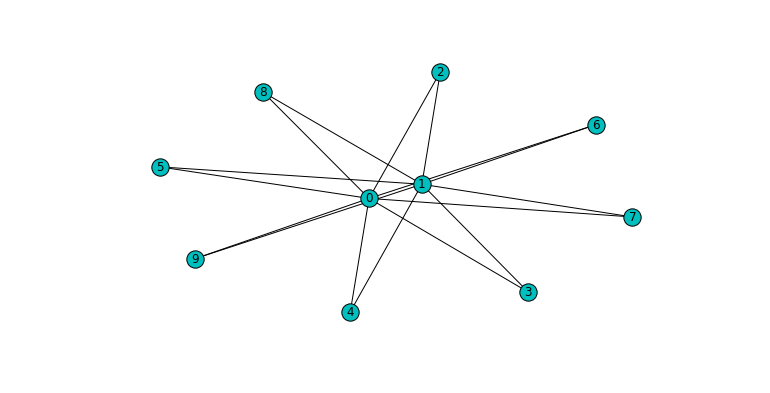

In [11]:
nNodes = 10
A = np.zeros((nNodes,nNodes))
A[0,:] = np.ones(nNodes)
A[1,:] = np.ones(nNodes)
A[0,1] = -1
A[0,0] = 0
A[1,1] = 0
A = A + A.T

graph = nx.from_numpy_matrix(A)
labels = {0:'0',1:'1',2:'2',3:'3',
          4:'4',5:'5',6:'6',7:'7',
          8:'8',9:'9'
         }
nx.draw(graph,with_labels=True,node_color='c')
plt.show()

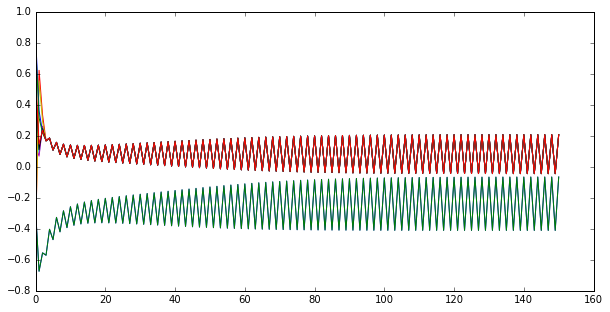

Variance in last orbit: 0.0119276065461


In [12]:
nNodes = A.shape[0]
#x =np.random.rand(nNodes)*2 -1
#coolChimera = np.array([ -0.28329926, -0.5, -0.47900975,  0.4605653 ,  0.12948887,
#       -0.43348878,  0.5343736 ,  0.84077595,  0.79935279,  0.59625345])
chimera = np.array([ -0.28329926, -0.28329926, -0.47900975,  0.4605653 ,  0.12948887,
       -0.43348878,  0.5343736 ,  0.84077595,  0.79935279,  0.59625345])
orb = synchronize(chimera,F,G,A,d=0.22,iters=150)
plotAllOrb(orb,k=0)

Here we have node 0 and node 1 synchronizing in teal and all other nodes synchronizing in red. Once again, this was highly dependant on the d value.